# Hotel Bookings EDA

## Objective
We are provided with a hotel bookings dataset.

Out main objective is perform EDA on the given dataset and draw useful conclusions about general trends in hotel bookings and how factors governing hotel bookings interact with each other.

### Dataset
We are given a hotel bookings dataset. This dataset contains booking information for a city hotel and a resort hotel. It contains the following features.

- hotel: Name of hotel ( City or Resort)
- is_canceled: Whether the booking is canceled or not (0 for no canceled and 1 for canceled)
- lead_time: time (in days) between booking transaction and actual arrival.
- arrival_date_year: Year of arrival
- arrival_date_month: month of arrival
- arrival_date_week_number: week number of arrival date.
- arrival_date_day_of_month: Day of month of arrival date
- stays_in_weekend_nights: No. of weekend nights spent in a hotel
- stays_in_week_nights: No. of weeknights spent in a hotel
- adults: No. of adults in single booking record.
- children: No. of children in single booking record.
- babies: No. of babies in single booking record. 
- meal: Type of meal chosen 
- country: Country of origin of customers (as mentioned by them)
- market_segment: What segment via booking was made and for what purpose.
- distribution_channel: Via which medium booking was made.
- is_repeated_guest: Whether the customer has made any booking before(0 for No and 1 for 
                     Yes)
- previous_cancellations: No. of previous canceled bookings.
- previous_bookings_not_canceled: No. of previous non-canceled bookings.
- reserved_room_type: Room type reserved by a customer.
- assigned_room_type: Room type assigned to the customer.
- booking_changes: No. of booking changes done by customers
- deposit_type: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund)
- agent: Id of agent for booking
- company: Id of the company making a booking
- days_in_waiting_list: No. of days on waiting list.
- customer_type: Type of customer(Transient, Group, etc.)
- adr: Average Daily rate.
- required_car_parking_spaces: No. of car parking asked in booking
- total_of_special_requests: total no. of special request.
- reservation_status: Whether a customer has checked out or canceled,or not showed 
- reservation_status_date: Date of making reservation status.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("hotel_bookings.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
#Create the copy of dataframe
df1 = df.copy()

In [9]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [10]:
df1.hotel.value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [11]:
df1.is_canceled.value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [12]:
df1.is_canceled.value_counts(dropna = False)

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [13]:
df1.arrival_date_year.value_counts(dropna = False)

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

In [14]:
df1.meal.value_counts(dropna = False)

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [15]:
df1.market_segment.value_counts(dropna = False)

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [16]:
df1.distribution_channel.value_counts(dropna = False)

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

In [17]:
df1.children.value_counts(dropna = False)

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
NaN          4
10.0         1
Name: count, dtype: int64

## Cleaning the data
    

While cleaning data we will perform following steps:
1. Remove duplicate values/rows.
2. Handling missing data.
3. Convert the columns to appropiate datatypes.
4. Adding imp columns.

### 1. Removing Duplicate Columns

In [18]:
df1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [19]:
df1[df1.duplicated()].shape

(31994, 32)

In [20]:
#dropping duplicate rows
df1.drop_duplicates(inplace = True)

In [21]:
df1.shape

(87396, 32)

### 2.Handling Missing Values

In [22]:
df1.isnull().sum().sort_values(ascending = False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


Since, company and agent columns have null values. There may be some cases in which the customer didnt booked the hotel through any agent or company. So, null values can be kept and replaced by 0.

In [23]:
 df1.agent.fillna(0,inplace = True)

In [24]:
df1.isnull().sum().sort_values(ascending = False)[0:4]

company     82137
country       452
children        4
agent           0
dtype: int64

In [25]:
 df1.company.fillna(0,inplace = True)

In [26]:
df1.isnull().sum().sort_values(ascending = False)[0:4]

country     452
children      4
hotel         0
agent         0
dtype: int64

In [27]:
df1.children.value_counts(dropna = False)

children
0.0     79028
1.0      4695
2.0      3593
3.0        75
NaN         4
10.0        1
Name: count, dtype: int64

NAN Values can be replaced by 0 as 0 column is present. So, customer might have forgetten to fill the column.

In [28]:
df1.children.fillna(0,inplace = True)

In [29]:
df1.children.value_counts(dropna = False)

children
0.0     79032
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: count, dtype: int64

In [30]:
df1.isnull().sum().sort_values(ascending = False)[0:4]

country                   452
hotel                       0
previous_cancellations      0
reservation_status          0
dtype: int64

In [31]:
df1.country.value_counts()

country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: count, Length: 177, dtype: int64

We can convert the null values in country column to others.

In [32]:
df1.country.fillna("others",inplace = True)

In [33]:
df1.isnull().sum().sort_values(ascending = False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [34]:
df1[df1.adults + df1.babies + df1.children == 0].shape

(166, 32)

We will remove all such rows with zero adults, babies and children since no one is in hotel.

In [35]:
df1.drop(df1[df1.adults + df1.babies + df1.children == 0].index,inplace = True)

In [36]:
df1.shape

(87230, 32)

### 3. Converting columns into appropritate columns

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  float64
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [38]:
df1[["children","company","agent"]] = df1[["children","company","agent"]].astype('int64')

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87230 non-null  object 
 1   is_canceled                     87230 non-null  int64  
 2   lead_time                       87230 non-null  int64  
 3   arrival_date_year               87230 non-null  int64  
 4   arrival_date_month              87230 non-null  object 
 5   arrival_date_week_number        87230 non-null  int64  
 6   arrival_date_day_of_month       87230 non-null  int64  
 7   stays_in_weekend_nights         87230 non-null  int64  
 8   stays_in_week_nights            87230 non-null  int64  
 9   adults                          87230 non-null  int64  
 10  children                        87230 non-null  int64  
 11  babies                          87230 non-null  int64  
 12  meal                            8723

In [40]:
df1.reservation_status_date

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 87230, dtype: object

In [41]:
df1["reservation_status_date"] = pd.to_datetime(df1["reservation_status_date"],format = "%Y-%m-%d")

In [42]:
df1.reservation_status_date

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 87230, dtype: datetime64[ns]

### 4. Adding imp columns to dataframe

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87230 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87230 non-null  object        
 1   is_canceled                     87230 non-null  int64         
 2   lead_time                       87230 non-null  int64         
 3   arrival_date_year               87230 non-null  int64         
 4   arrival_date_month              87230 non-null  object        
 5   arrival_date_week_number        87230 non-null  int64         
 6   arrival_date_day_of_month       87230 non-null  int64         
 7   stays_in_weekend_nights         87230 non-null  int64         
 8   stays_in_week_nights            87230 non-null  int64         
 9   adults                          87230 non-null  int64         
 10  children                        87230 non-null  int64         
 11  babies

In [44]:
df1.stays_in_week_nights

0         0
1         0
2         1
3         1
4         2
         ..
119385    5
119386    5
119387    5
119388    5
119389    7
Name: stays_in_week_nights, Length: 87230, dtype: int64

In [45]:
df1.stays_in_weekend_nights

0         0
1         0
2         0
3         0
4         0
         ..
119385    2
119386    2
119387    2
119388    2
119389    2
Name: stays_in_weekend_nights, Length: 87230, dtype: int64

In [46]:
df1["total_stay"] = df1.stays_in_week_nights + df1.stays_in_weekend_nights

In [47]:
df1.total_stay

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: total_stay, Length: 87230, dtype: int64

In [48]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [49]:
df1["total_people"] = df1.adults + df1.babies + df1.children

In [50]:
df1.total_people

0         2
1         2
2         1
3         1
4         2
         ..
119385    2
119386    3
119387    2
119388    2
119389    2
Name: total_people, Length: 87230, dtype: int64

In [51]:
df1.shape

(87230, 34)

# EDA

In [52]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

In [53]:
num_df1.corr()

,lead_time,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stay,total_people
lead_time,1.000000,0.005370,-0.079021,0.080822,0.131909,0.021948,-0.086736,0.034048,0.320914,0.125262
previous_cancellations,0.005370,1.000000,0.391766,-0.010267,0.003733,-0.050359,-0.003480,0.001695,-0.021635,-0.045222
previous_bookings_not_canceled,-0.079021,0.391766,1.000000,0.005774,-0.006334,-0.086052,0.040712,0.027044,-0.064973,-0.114406
booking_changes,0.080822,-0.010267,0.005774,1.000000,0.024143,0.010144,0.050659,0.018308,0.062366,0.002619
days_in_waiting_list,0.131909,0.003733,-0.006334,0.024143,1.000000,-0.032522,-0.015995,-0.049438,-0.010599,-0.024488
adr,0.021948,-0.050359,-0.086052,0.010144,-0.032522,1.000000,0.038733,0.137461,0.056102,0.382210
required_car_parking_spaces,-0.086736,-0.003480,0.040712,0.050659,-0.015995,0.038733,1.000000,0.048479,-0.049179,0.030905
total_of_special_requests,0.034048,0.001695,0.027044,0.018308,-0.049438,0.137461,0.048479,1.000000,0.040800,0.127876
total_stay,0.320914,-0.021635,-0.064973,0.062366,-0.010599,0.056102,-0.049179,0.040800,1.000000,0.107087
total_people,0.125262,-0.045222,-0.114406,0.002619,-0.024488,0.382210,0.030905,0.127876,0.107087,1.000000


<Axes: >

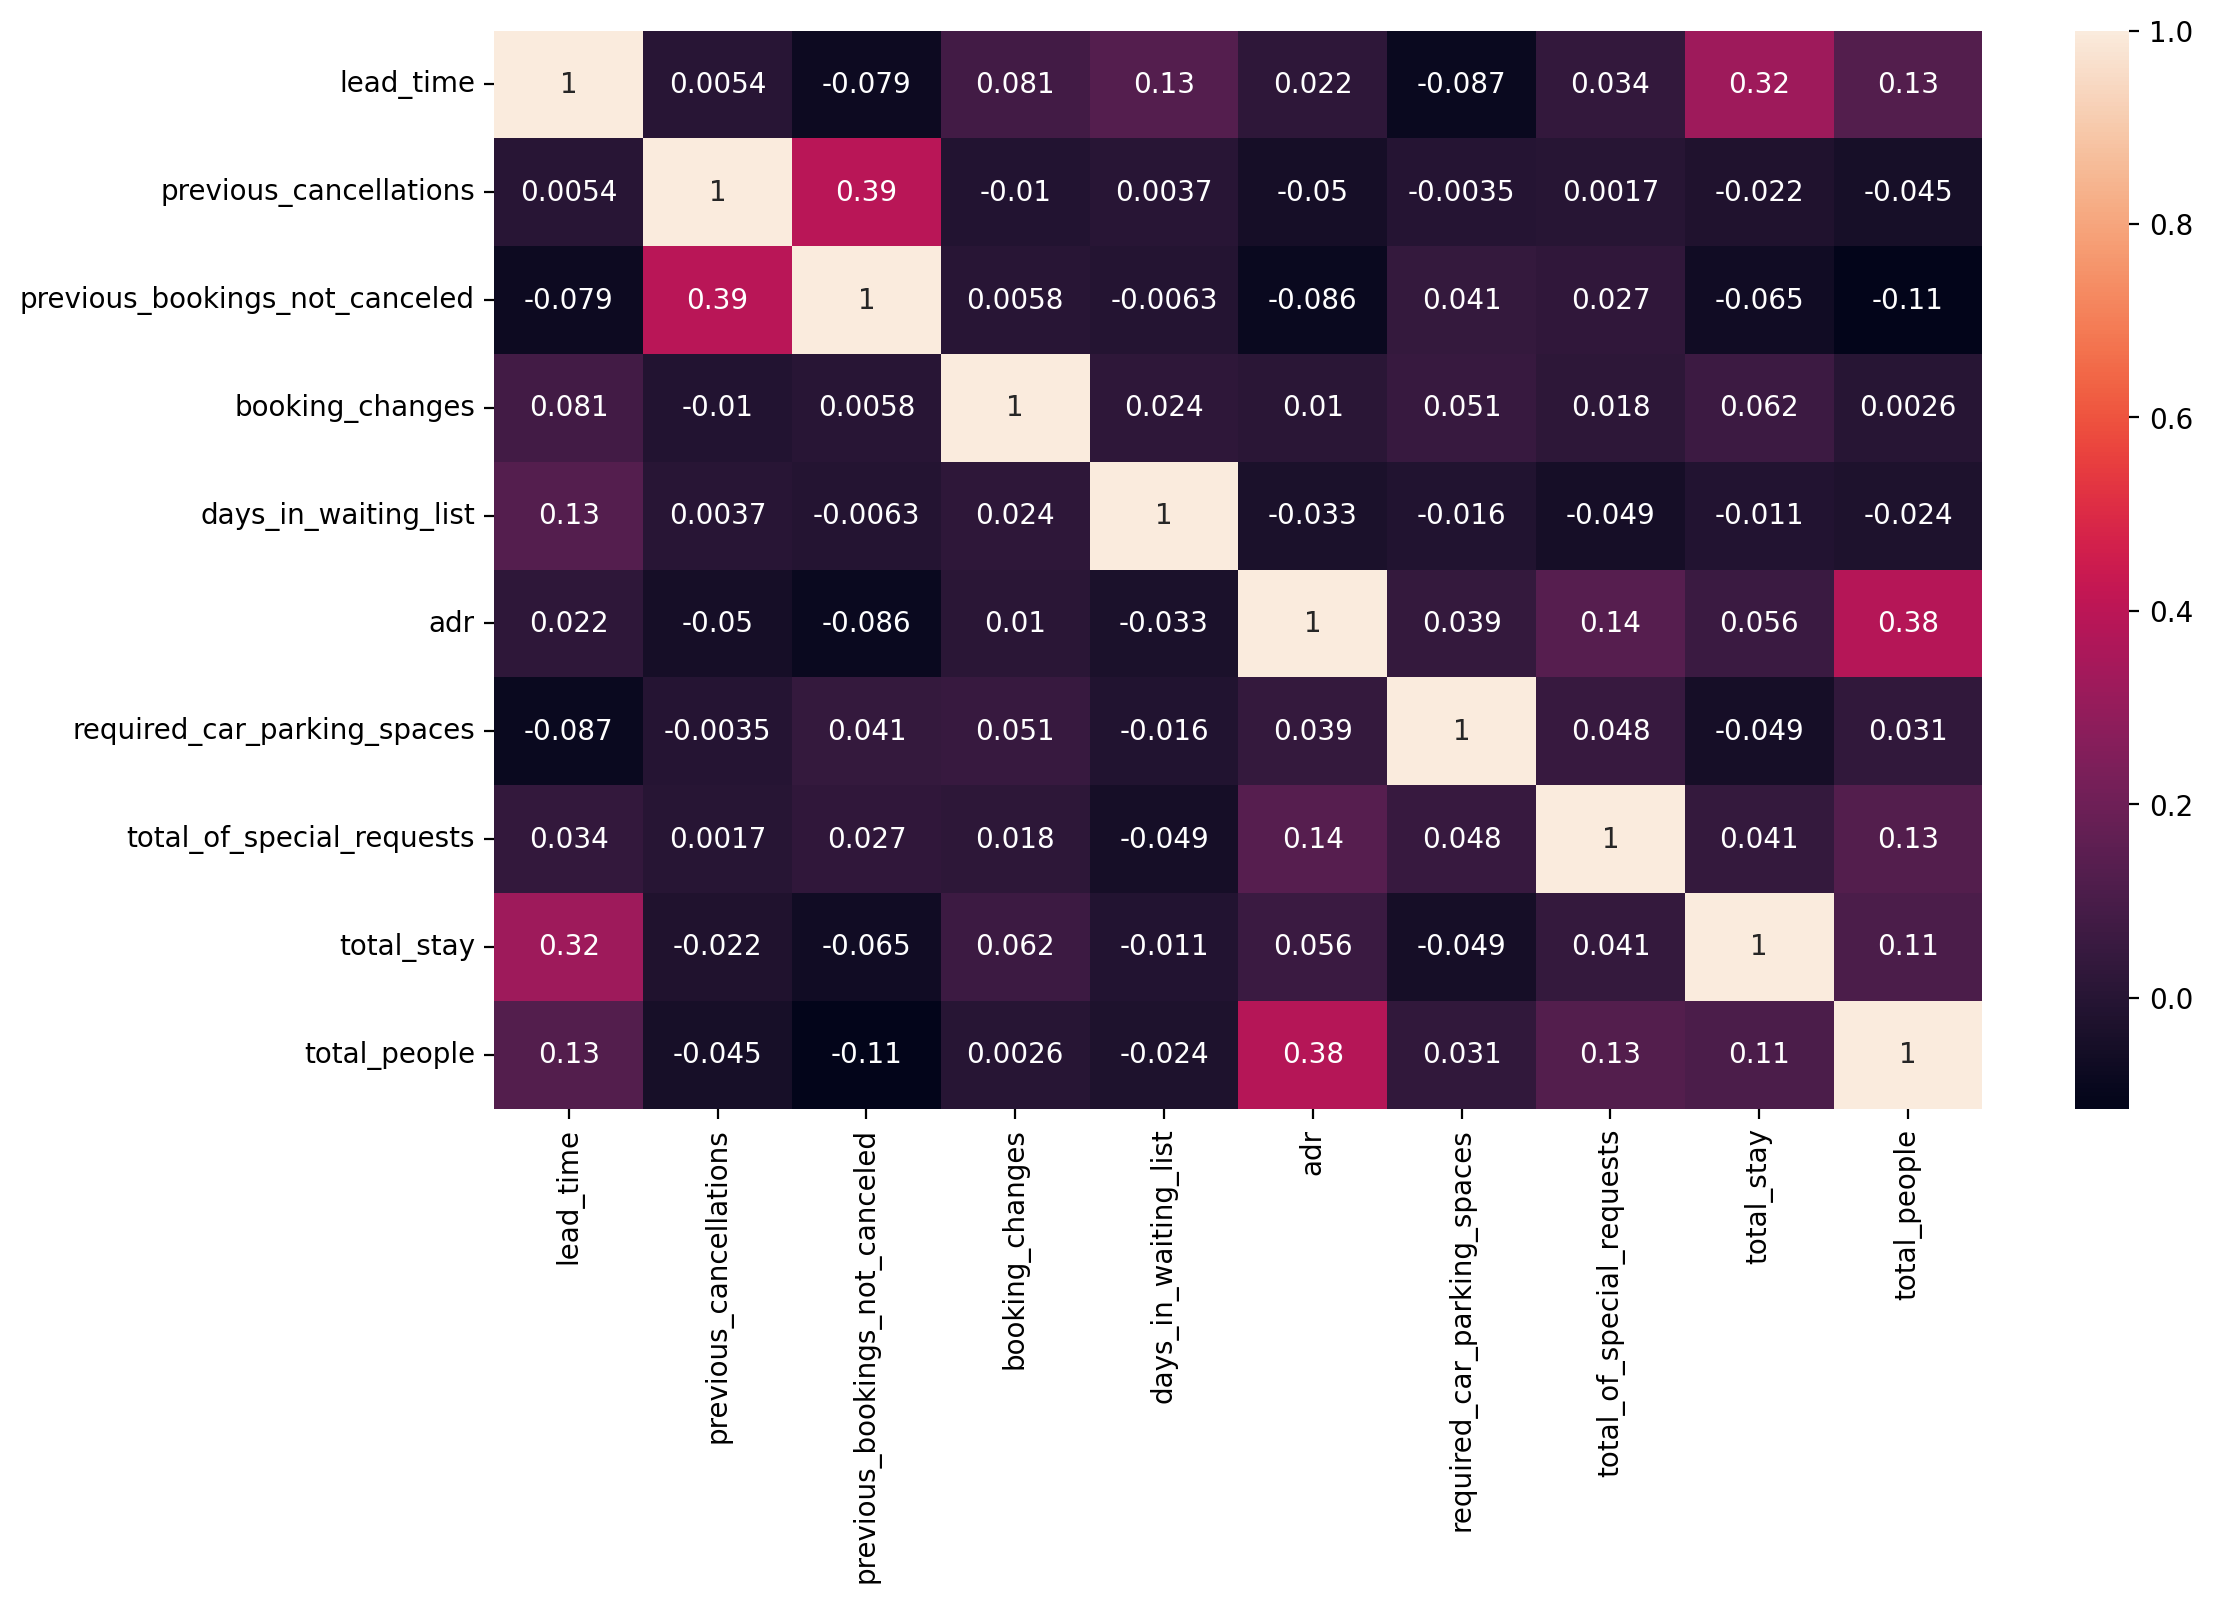

In [54]:
plt.figure(figsize = (12,7), dpi = 200)
sns.heatmap(num_df1.corr(), annot = True)

There is slight corelation between total_people and adr(average daily rate). This makes sense as more number of people means more revenue.

<Axes: xlabel='total_stay', ylabel='adr'>

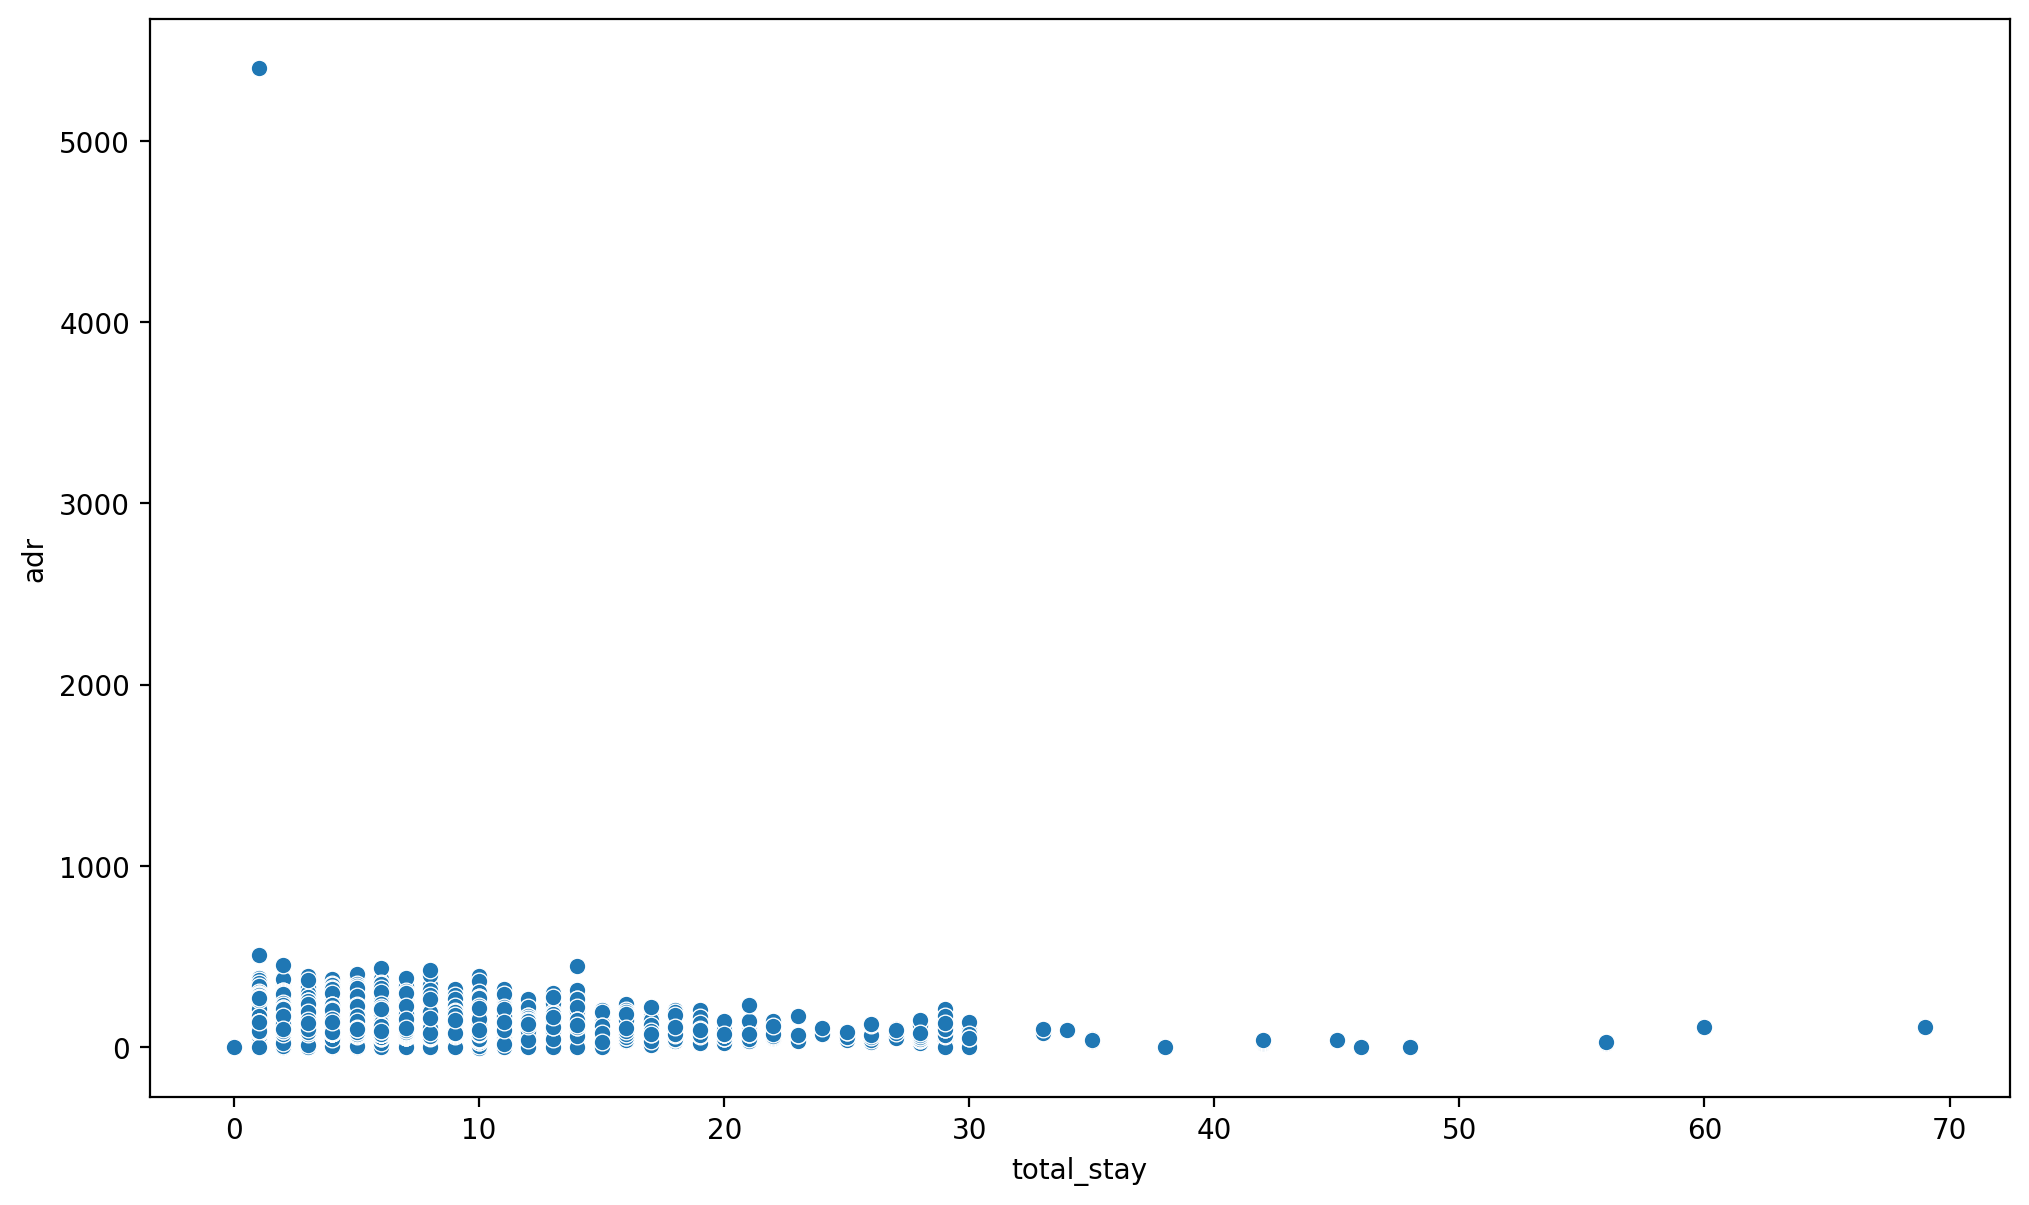

In [55]:
plt.figure(figsize = (12,7), dpi = 200)
sns.scatterplot(x = df1.total_stay,y = df1.adr)

Here we can see that there is a outlier present. So we will remove it.

In [56]:
df1[df1.adr >5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,0,0,Transient,5400.0,0,0,Canceled,2016-02-19,1,2


In [57]:
df1.drop(df1[df1.adr >5000].index,inplace = True)

In [58]:
df1[df1.adr >5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people


<Axes: xlabel='total_stay', ylabel='adr'>

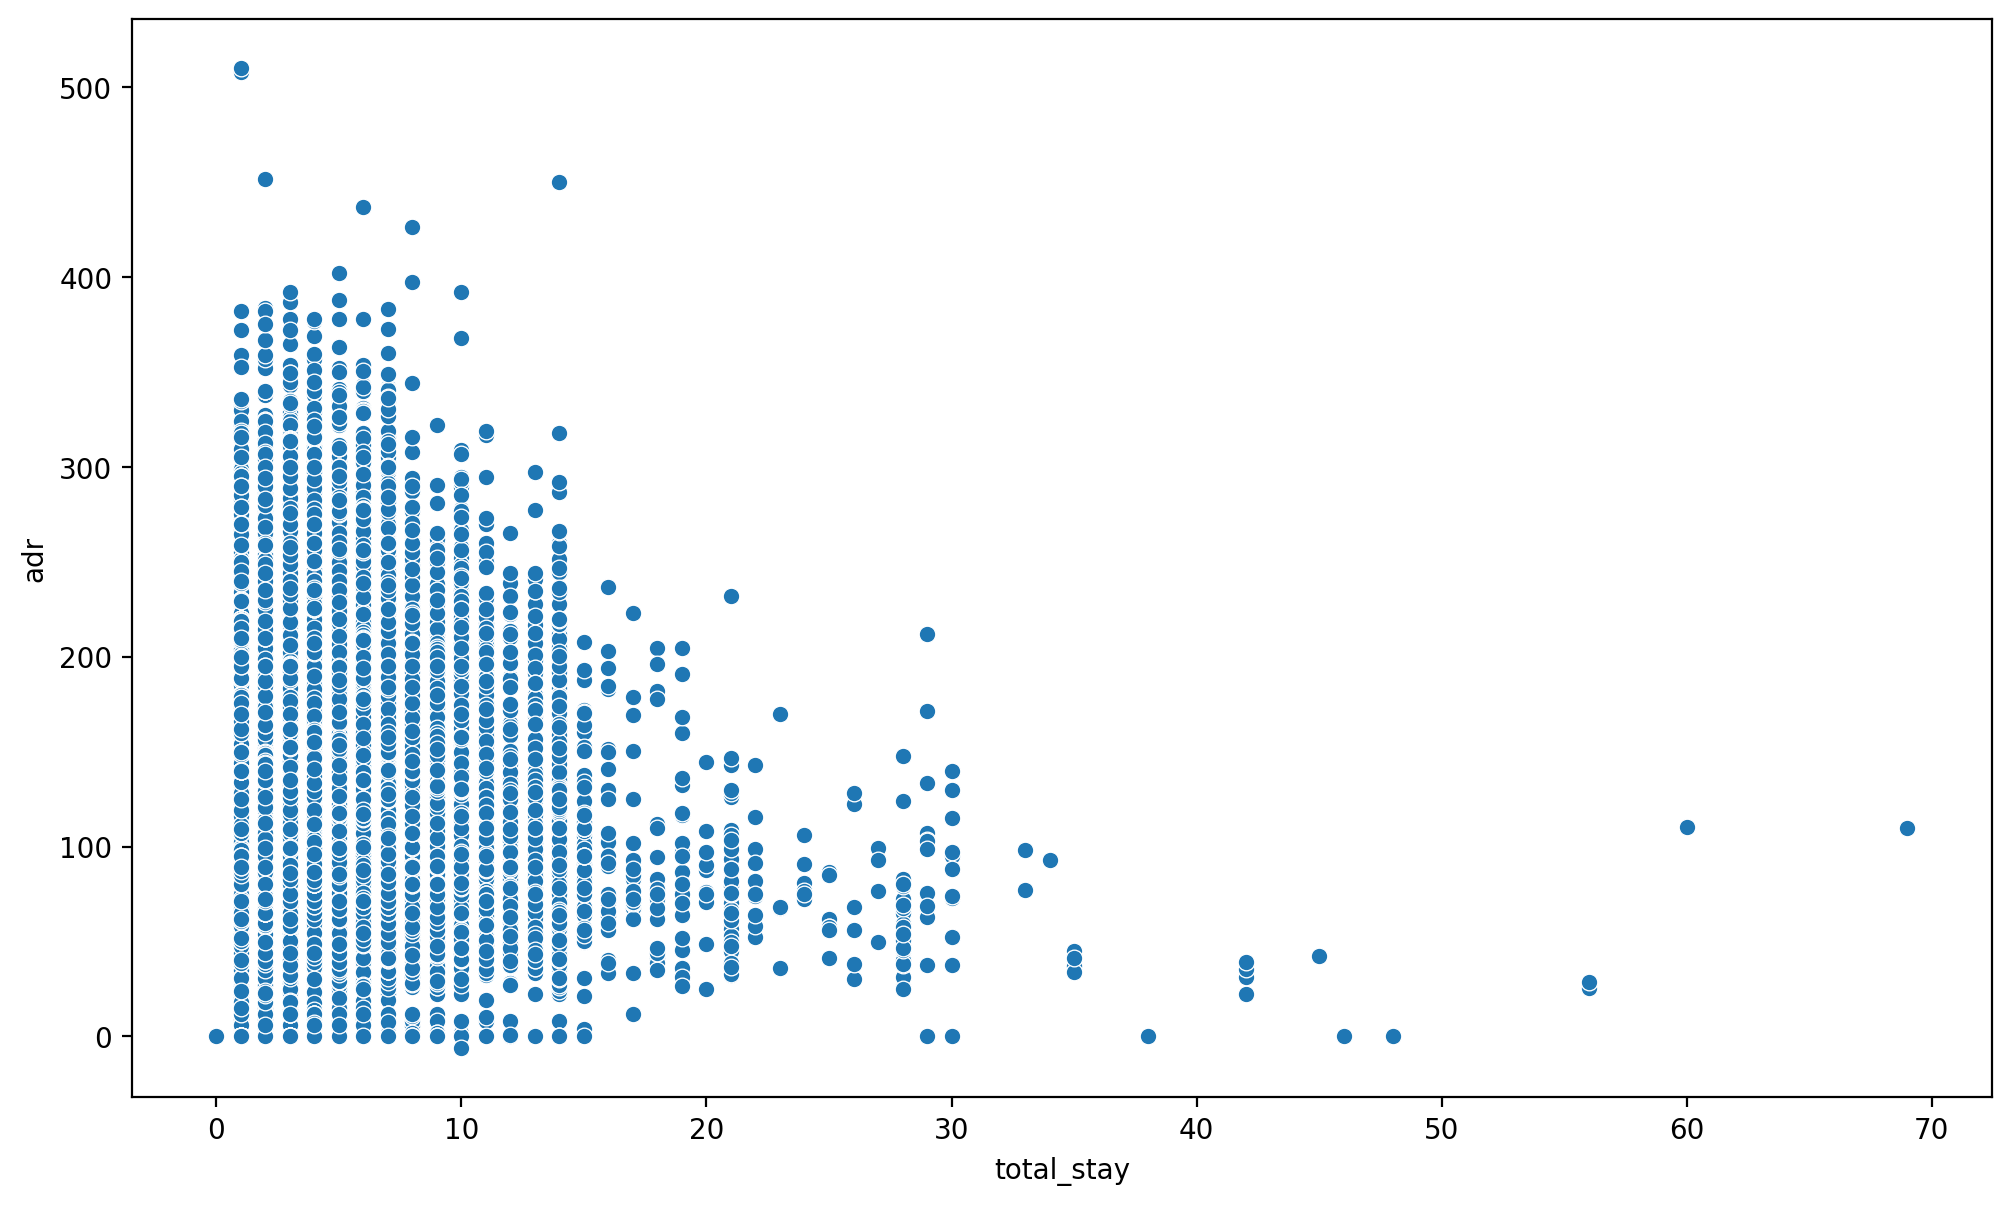

In [59]:
plt.figure(figsize = (12,7), dpi = 200)
sns.scatterplot(x = df1.total_stay,y = df1.adr)

From the scatter plot we can onserve that as length of the stay increases. The adr increases.

## Q1 Most no. of bookings by agent

In [60]:
top_agent = df1.agent.value_counts().sort_values(ascending = False)

In [61]:
top_agent[0:10]

agent
9      28721
240    13028
0      12141
14      3342
7       3294
250     2779
241     1644
28      1493
8       1383
1       1228
Name: count, dtype: int64

<Axes: xlabel='agent', ylabel='count'>

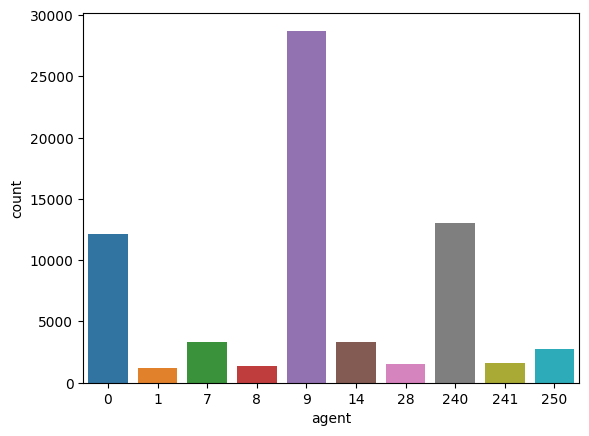

In [62]:
sns.barplot(x=top_agent[0:10].index, y = top_agent[0:10])

## 2. Which room type is in most demand

In [63]:
top_room = df1.assigned_room_type.value_counts()

In [64]:
top_room

assigned_room_type
A    46282
D    22419
E     7190
F     3627
G     2495
C     2160
B     1811
H      706
I      353
K      185
L        1
Name: count, dtype: int64

<Axes: xlabel='assigned_room_type', ylabel='count'>

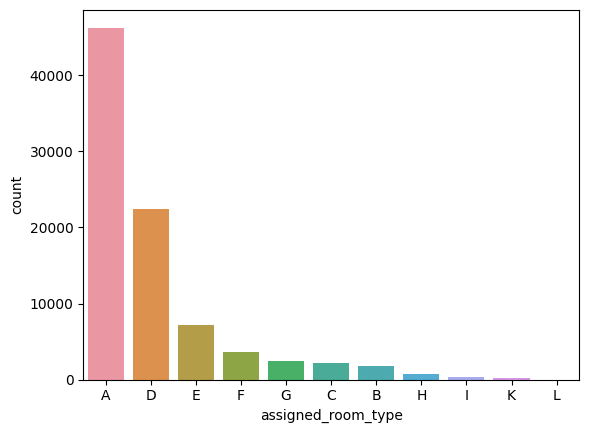

In [65]:
sns.barplot(x = top_room.index, y = top_room)

## 3. Which room type generate the highest adr

<Axes: xlabel='assigned_room_type', ylabel='adr'>

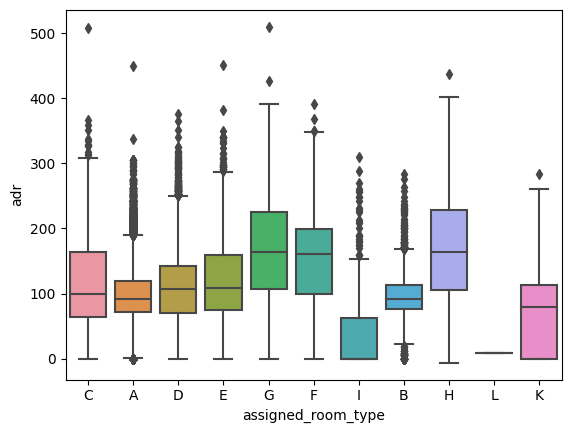

In [66]:
sns.boxplot(x = df1.assigned_room_type,y = df1.adr)

Most demanded room is A but better adr rooms are H, G and C.

## 4. Which meal type is most preffered

In [67]:
meal = df1.meal.value_counts()

In [68]:
meal

meal
BB           67906
SC            9391
HB            9080
Undefined      492
FB             360
Name: count, dtype: int64

<Axes: xlabel='meal', ylabel='count'>

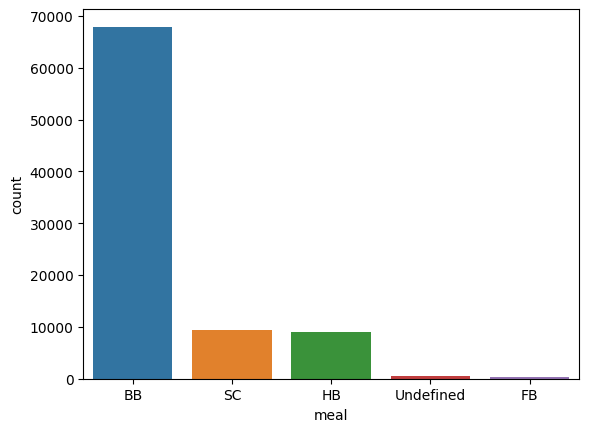

In [69]:
sns.barplot(x=meal.index,y=meal)

Most customers prefer BB(bed and breakfast)

## 5. What is percentage of bookings in each hotel

In [70]:
perc_bookings = df1.hotel.value_counts()/len(df1) * 100

<Axes: xlabel='hotel', ylabel='count'>

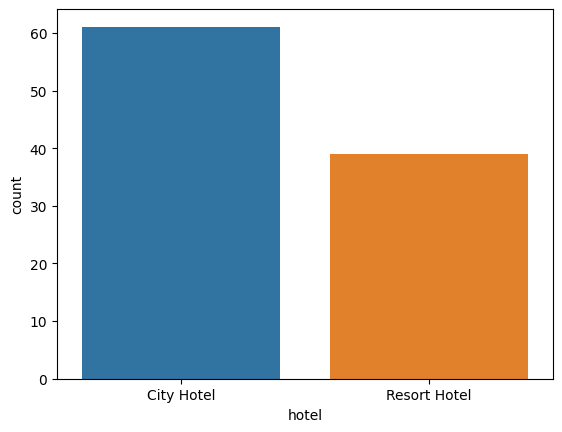

In [71]:
sns.barplot(x = perc_bookings.index,y=perc_bookings)

## 6. What is the most common channel for booking hotel?

In [72]:
top_channel = df1.distribution_channel.value_counts()

In [73]:
top_channel

distribution_channel
TA/TO        69027
Direct       12954
Corporate     5062
GDS            181
Undefined        5
Name: count, dtype: int64

<Axes: xlabel='distribution_channel', ylabel='count'>

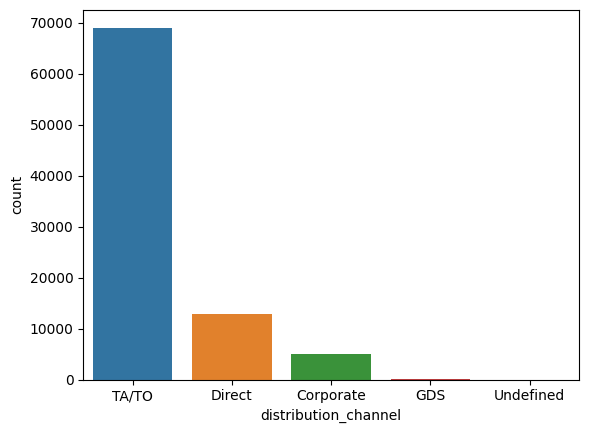

In [74]:
sns.barplot(x=top_channel.index,y=top_channel)

## 7. Most busy months for bookings

In [75]:
busy_months = df1.arrival_date_month.value_counts()

In [76]:
busy_months

arrival_date_month
August       11242
July         10043
May           8344
April         7900
June          7756
March         7488
October       6921
September     6682
February      6083
December      5112
November      4973
January       4685
Name: count, dtype: int64

<Axes: xlabel='arrival_date_month', ylabel='count'>

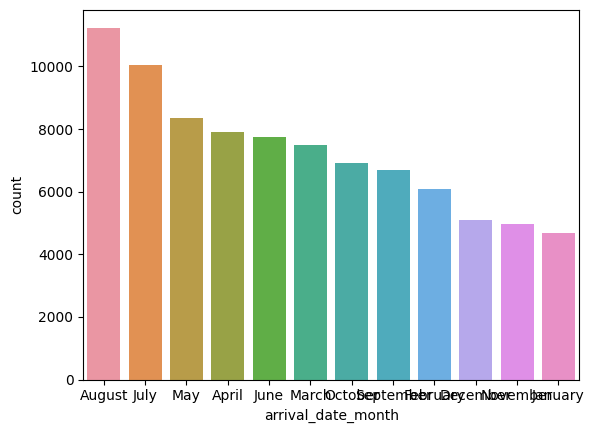

In [77]:
sns.barplot(x=busy_months.index,y=busy_months)

## 8. Most number of guest from which country?

In [78]:
top_country = df1.country.value_counts()[:10]

In [79]:
top_country

country
PRT    27354
GBR    10424
FRA     8823
ESP     7244
DEU     5385
ITA     3061
IRL     3015
BEL     2081
BRA     1993
NLD     1910
Name: count, dtype: int64

<Axes: xlabel='country', ylabel='count'>

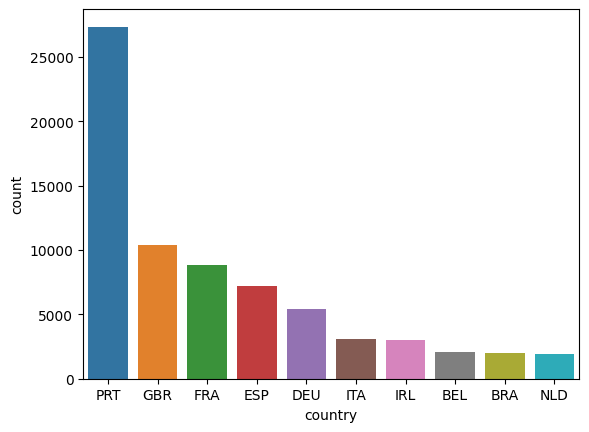

In [80]:
sns.barplot(x=top_country.index,y=top_country)

## 9. How long people stay in hotel

In [81]:
stay = df1.total_stay.value_counts()[:10]

In [82]:
stay

total_stay
3     17827
1     17168
2     15734
4     13565
7      7520
5      6729
6      3263
10     1072
8      1062
14      859
Name: count, dtype: int64

<Axes: xlabel='total_stay', ylabel='count'>

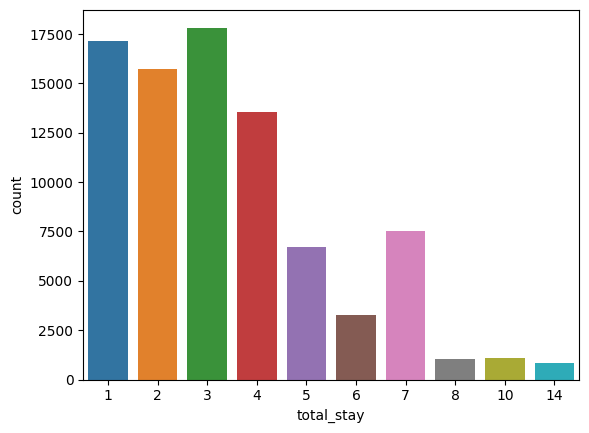

In [83]:
sns.barplot(x=stay.index,y=stay)

## 10. Which hotel has higher cancellation rate

In [84]:
cancelled = df1[df1.is_canceled == 1]

In [85]:
canceled_bookings = cancelled.groupby("hotel").count().is_canceled

In [86]:
total_bookings = df1.groupby("hotel").count().is_canceled

In [87]:
cancel_perc = (canceled_bookings/total_bookings) * 100

In [88]:
cancel_perc

hotel
City Hotel      30.097798
Resort Hotel    23.483331
Name: is_canceled, dtype: float64

## 11. Which hotel has higher chance of repeated stay

In [89]:
repeated_guest = df1[df1.is_repeated_guest == 1]

In [90]:
repeated_guest = repeated_guest.groupby("hotel").count().is_repeated_guest

In [91]:
repeated_guest

hotel
City Hotel      1657
Resort Hotel    1707
Name: is_repeated_guest, dtype: int64

In [92]:
total_guests = df1.groupby("hotel").count().is_repeated_guest

In [93]:
prec_repeated = (repeated_guest/total_guests) * 100

In [94]:
prec_repeated

hotel
City Hotel      3.110394
Resort Hotel    5.027094
Name: is_repeated_guest, dtype: float64

## 12. Does a longer waiting period causes cancellation of bookings

In [99]:
waited_bookings = df1[df1.days_in_waiting_list!=0]

<Axes: xlabel='days_in_waiting_list', ylabel='Density'>

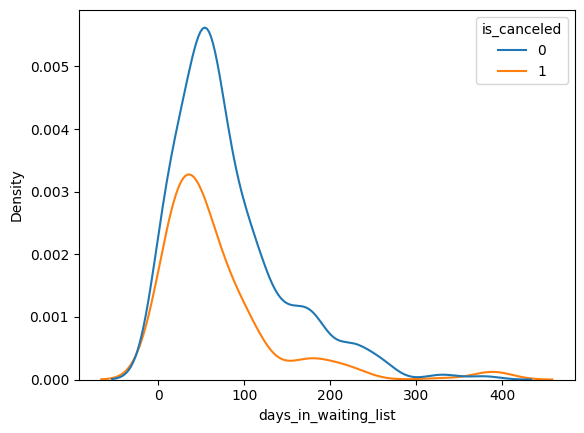

In [102]:
sns.kdeplot(x = "days_in_waiting_list", data = waited_bookings,hue = "is_canceled")

We can see that most of the bookings that are cancelled have waiting period of 150 days but also most bookings rhat are not cancelled also have waiting period of 150 days. Hence this shows that waiting period has no effect on cancellation of bookings.

## 13. Whether not getting the same room type as demand is main cause of cancellation for bookings?

In [106]:
cancellations = df1[df1.is_canceled == 1]

count = 0
count1 = 0

cancellations["same_room_not_alloted"] = cancellations["reserved_room_type"]!= cancellations["assigned_room_type"]
cancellations["same_room_not_alloted"].value_counts()/len(cancellations) * 100


same_room_not_alloted
False    97.434189
True      2.565811
Name: count, dtype: float64

Same room not alloted as demand is not the main cause of cancellation.

## 14. Does not alloting the same room as demanded affects adr?

<Axes: xlabel='same_room_not_alloted', ylabel='adr'>

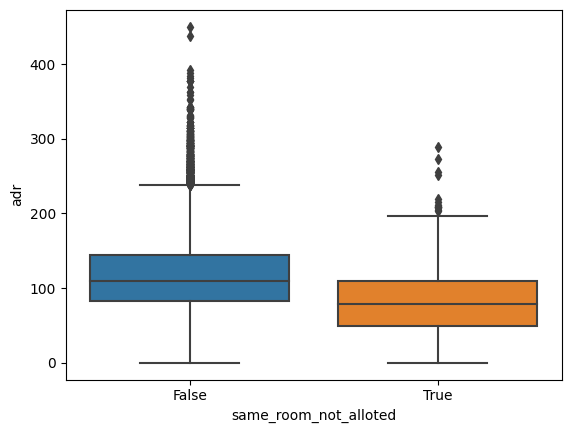

In [107]:
sns.boxplot(x = "same_room_not_alloted",y = "adr", data = cancellations)

## 15. Which types of customers mostly make bookings 

In [110]:
not_cancelled = df1[df1.is_canceled == 0]

In [111]:
not_cancelled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7,2
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7,3
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7,2
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7,2


In [116]:
singles = not_cancelled[(not_cancelled["adults"]==1)&(not_cancelled["children"]==0)&(not_cancelled["babies"]==0)]

In [117]:
len(singles)

12974

In [119]:
couples = not_cancelled[(not_cancelled["adults"]==2)&(not_cancelled["children"]==0)&(not_cancelled["babies"]==0)]

In [120]:
len(couples)

40624

In [122]:
family = not_cancelled[(not_cancelled["adults"])+(not_cancelled["children"])+(not_cancelled["babies"])>2]

In [123]:
len(family)

9286

Most couples makes hotel bookings. Although we cannot confirm that they are couples as data does'nt tell about that.